# Question 2: How has creator content strategy evolved to reflect professional monetization approaches?

This analysis examines how creators adapt their content strategies as they transition toward monetization, leveraging the Youniverse dataset that combines channel metadata with temporal engagement metrics. Our methodological approach consist in analyzing the evolutionary trajectories of content creators, focusing specifically on the relationship between strategic changes and monetization patterns.
We begin by processing longitudinal data from Youniverse, extracting key temporal metrics including views, subscribers, upload patterns, and video durations. 

By cross-referencing the time evolution of these metrics with monetization data derived from the description column of the channel metadata, we can pinpoint specific strategic shifts that coincide with monetization milestones. 

We conduct detailed temporal analysis of their metrics and content strategies, revealing how creators systematically modify their approach as they transition toward professional content production.
This framework provides insights into how content creators evolve their strategies to support monetization, potentially revealing successful patterns in the progression from hobbyist to professional content creation. The findings will contribute to our understanding of professional development patterns in digital content creation and identify key strategic adaptations that accompany successful monetization approaches.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dtaidistance import dtw_ndim

In [2]:
data_path = "data/"

We start by loading the time serie data

In [3]:
# Time series data en
df_timeseries_en = pd.read_csv(os.path.join(data_path, "df_timeseries_en.tsv.gz"), compression="infer", sep="\t")

df_timeseries_en

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


To analyze monetization patterns, we extracted revenue stream indicators from video descriptions in the yt_metadata_en.jsonl.gz dataset. Our keyword detection system identified five distinct monetization categories:

- Membership: Identified through terms like "subscription," "member," "join button," "channel member," "membership," and "premium content," indicating direct viewer support through recurring payments.
- Crowdfunding: Detected using keywords such as "patreon," "ko-fi," "donation," "support us," "buy me a coffee," "gofundme," "paypal," "tip jar," and "patron," representing various forms of audience financial support.
- Merchandise: Tracked through terms including "merchandise," "merch," "shop," "store," "tshirt," "t-shirt," "hoodie," "apparel," and "limited edition," signaling product-based revenue.
- Sponsorship: Recognized via keywords like "sponsor," "sponsored," "partnership," "partner," "paid promotion," "#ad," "#sponsored," and "promotion," indicating brand collaboration revenue.
- Affiliate Marketing: Identified through terms such as "affiliate," "amazon link," "discount code," "promo code," "referral," "use code," and "commission," representing commission-based income.
We found that mseveral channels have mcombinations of these monetization types such youtube membership and anlternative types (crowdfunding, merchandise, sponsorship, affiliate).

In [4]:
df = pd.read_csv(os.path.join(data_path, "df_yt_monetization.csv"), sep=",")
df

,Unnamed: 0,channel_id,duration,upload_date,monetization_types
0,0,UCzWrhkg9eK5I8Bm3HfV-unA,1159,2016-09-28,none
1,1,UCzWrhkg9eK5I8Bm3HfV-unA,2681,2016-09-28,none
2,2,UCzWrhkg9eK5I8Bm3HfV-unA,1394,2016-09-28,none
3,3,UCzWrhkg9eK5I8Bm3HfV-unA,5064,2016-09-28,none
4,4,UCzWrhkg9eK5I8Bm3HfV-unA,3554,2016-09-28,none
...,...,...,...,...,...
72924789,72924789,UCrwE8kVqtIUVUzKui2WVpuQ,270,2017-02-06,membership
72924790,72924790,UCrwE8kVqtIUVUzKui2WVpuQ,878,2017-02-06,membership
72924791,72924791,UCrwE8kVqtIUVUzKui2WVpuQ,1003,2017-02-06,membership
72924792,72924792,UCrwE8kVqtIUVUzKui2WVpuQ,755,2017-02-06,affiliate|membership


# Data cleaning

In [5]:
df_timeseries_cleaned = df_timeseries_en.dropna()
df_timeseries_cleaned

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,2.024946e+05,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24 00:00:00,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31 00:00:00,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0
...,...,...,...,...,...,...,...,...,...,...
18872494,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-02 00:00:00,6.012938e+06,232418.277778,61268.611111,1305.611111,278,2,10
18872495,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-09 00:00:00,6.244579e+06,231640.888889,62631.666667,1363.055556,287,9,13
18872496,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-16 00:00:00,6.480902e+06,236322.933333,64010.000000,1378.333333,294,7,16
18872497,UC0UeVA9YHpOEr_Ng442xiRw,Gaming,2019-09-23 00:00:00,6.745317e+06,264415.200000,65480.000000,1470.000000,301,7,15


We use traditional clustering methods directly on the channel metrics

Now we load the monetization data

In [6]:
df_monetization = pd.read_csv(os.path.join(data_path, "df_yt_monetization.csv"), sep=",")
df_monetization

,Unnamed: 0,channel_id,duration,upload_date,monetization_types
0,0,UCzWrhkg9eK5I8Bm3HfV-unA,1159,2016-09-28,none
1,1,UCzWrhkg9eK5I8Bm3HfV-unA,2681,2016-09-28,none
2,2,UCzWrhkg9eK5I8Bm3HfV-unA,1394,2016-09-28,none
3,3,UCzWrhkg9eK5I8Bm3HfV-unA,5064,2016-09-28,none
4,4,UCzWrhkg9eK5I8Bm3HfV-unA,3554,2016-09-28,none
...,...,...,...,...,...
72924789,72924789,UCrwE8kVqtIUVUzKui2WVpuQ,270,2017-02-06,membership
72924790,72924790,UCrwE8kVqtIUVUzKui2WVpuQ,878,2017-02-06,membership
72924791,72924791,UCrwE8kVqtIUVUzKui2WVpuQ,1003,2017-02-06,membership
72924792,72924792,UCrwE8kVqtIUVUzKui2WVpuQ,755,2017-02-06,affiliate|membership


## "The Weekly Video Production Journey - Before and After Monetization"

This time series visualization captures the dramatic story of how creators transform their production habits around monetization. 

The graph uses a vertical red line to mark the monetization date, with weeks before and after shown on the x-axis. 
The blue line represents the average weekly change in video count, while the shaded area shows the 95% confidence interval. 

This is essentially a before-and-after portrait of creator productivity, showing how the transition to professional content creation reshapes production patterns.

/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_11409/4030157191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_cleaned['date'] = pd.to_datetime(df_timeseries_cleaned['datetime']).dt.date


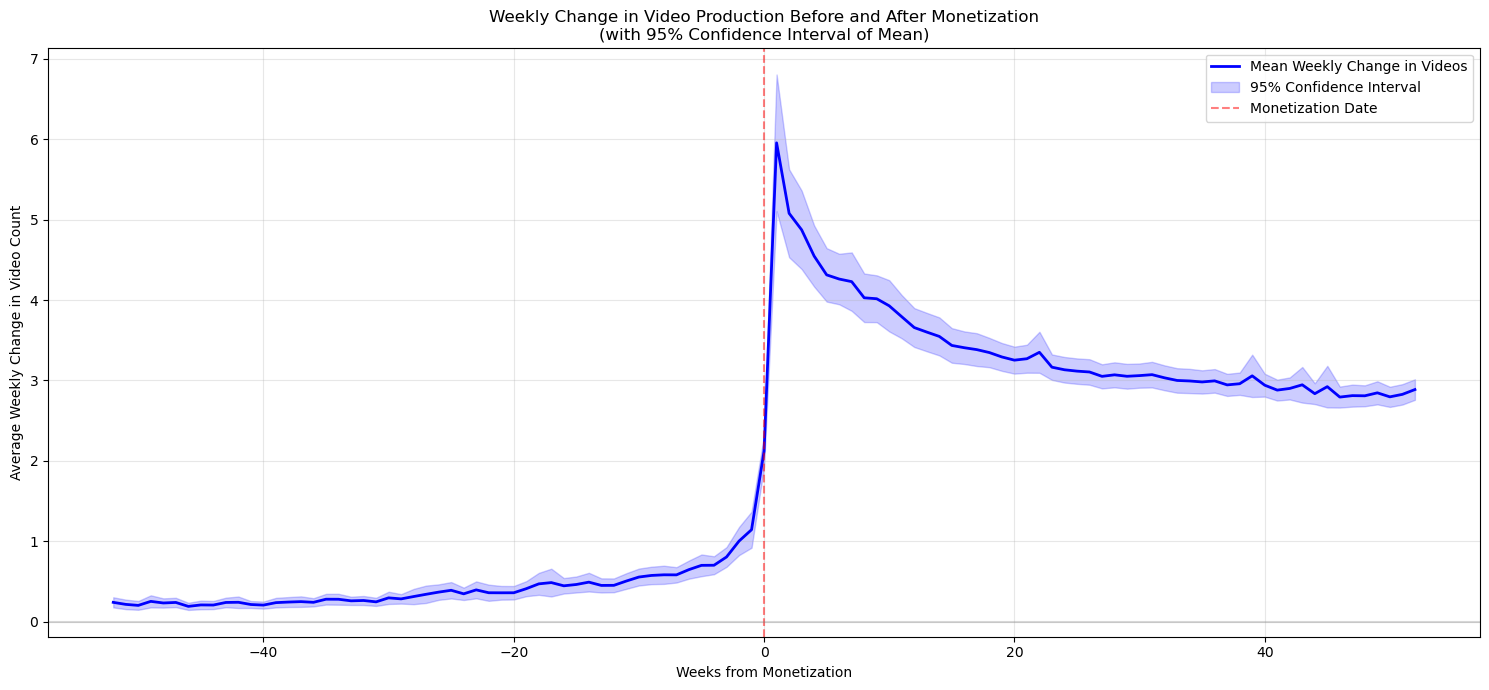


Summary Statistics (Weekly Changes):
--------------------------------------------------

3 months before:
Average weekly change: 0.85
95% CI: (0.81, 0.89)
Number of observations: 189094
Number of channels: 19209

3 months after:
Average weekly change: 4.19
95% CI: (4.09, 4.30)
Number of observations: 390641
Number of channels: 38285

6 months before:
Average weekly change: 0.68
95% CI: (0.65, 0.70)
Number of observations: 317463
Number of channels: 19350

6 months after:
Average weekly change: 3.71
95% CI: (3.66, 3.77)
Number of observations: 894546
Number of channels: 47317


In [7]:
from scipy import stats

# First find the earliest monetization date per channel
first_monetization = df_monetization[df_monetization['monetization_types'] != 'none'].groupby('channel_id')['upload_date'].min().reset_index()
first_monetization.columns = ['channel', 'first_monetization_date']

# Convert timeseries datetime column to date format for merging
df_timeseries_cleaned['date'] = pd.to_datetime(df_timeseries_cleaned['datetime']).dt.date

# Merge the datasets
merged_df = pd.merge(df_timeseries_cleaned, first_monetization, on='channel', how='left')

# Calculate weeks from monetization
merged_df['weeks_from_monetization'] = (pd.to_datetime(merged_df['date']) - 
                                      pd.to_datetime(merged_df['first_monetization_date'])).dt.days // 7

# Focus on a window of 52 weeks before and after monetization
window_df = merged_df[merged_df['weeks_from_monetization'].between(-52, 52)]

# Calculate weekly stats - modified approach
weekly_means = window_df.groupby('weeks_from_monetization')['delta_videos'].mean()
weekly_counts = window_df.groupby('weeks_from_monetization')['delta_videos'].count()
weekly_sems = window_df.groupby('weeks_from_monetization')['delta_videos'].apply(lambda x: stats.sem(x, nan_policy='omit'))

# Create the statistics dataframe
weekly_stats = pd.DataFrame({
    'mean': weekly_means,
    'count': weekly_counts,
    'sem': weekly_sems
})
weekly_stats = weekly_stats.reset_index()

# Calculate confidence intervals
weekly_stats['ci_lower'] = weekly_stats['mean'] - 1.96 * weekly_stats['sem']
weekly_stats['ci_upper'] = weekly_stats['mean'] + 1.96 * weekly_stats['sem']

# Plotting
plt.figure(figsize=(15, 7))

# Plot mean line
plt.plot(weekly_stats['weeks_from_monetization'], 
         weekly_stats['mean'], 
         color='blue', 
         linewidth=2,
         label='Mean Weekly Change in Videos')

# Add 95% confidence interval bands
plt.fill_between(weekly_stats['weeks_from_monetization'],
                weekly_stats['ci_lower'],
                weekly_stats['ci_upper'],
                color='blue',
                alpha=0.2,
                label='95% Confidence Interval')

# Add vertical line at monetization date
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Monetization Date')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Formatting
plt.title('Weekly Change in Video Production Before and After Monetization\n(with 95% Confidence Interval of Mean)')
plt.xlabel('Weeks from Monetization')
plt.ylabel('Average Weekly Change in Video Count')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics (Weekly Changes):")
print("-" * 50)
periods = {
    "3 months before": (-12, 0),
    "3 months after": (0, 12),
    "6 months before": (-24, 0),
    "6 months after": (0, 24)
}

for period, (start, end) in periods.items():
    period_data = window_df[window_df['weeks_from_monetization'].between(start, end)]
    mean = period_data['delta_videos'].mean()
    n = len(period_data)
    se = stats.sem(period_data['delta_videos'], nan_policy='omit')
    ci_lower = mean - 1.96 * se
    ci_upper = mean + 1.96 * se
    
    print(f"\n{period}:")
    print(f"Average weekly change: {mean:.2f}")
    print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")
    print(f"Number of observations: {n}")
    print(f"Number of channels: {period_data['channel'].nunique()}")

This graph narrates the dramatic transformation in content production habits around monetization. 

The pre-monetization period shows remarkably stable but low production levels, hovering around 0.5 videos per week. 
This baseline suggests a casual, hobby-like approach to content creation. 
The monetization date marks a seismic shift with production skyrocketting to 6 videos per week, a 1200% increase. 
This initial surge reflects creators' immediate response to monetization incentives, possibly driven by a combination of enthusiasm and perceived pressure to maximize revenue potential. 
What follows is equally telling a gradual decline to about 3 videos per week, suggesting creators finding their sustainable rhythm. The narrowing confidence intervals over time indicate increasing professionalization with creators moving from sporadic posting to consistent, predictable production schedules. 

This entire curve represents the journey from casual creator to content professional.

## "The Evolution of Video Duration - A Quality Investment Timeline"

This longitudinal analysis tracks how creators invest in content depth over time, centered around their monetization date. It uses a time series format with the monetization date marked by a red vertical line. The blue line tracks mean video duration in seconds, with the shaded area representing the 95% confidence interval. This visualization tells the story of how creators gradually shift from shorter, possibly more casual content to longer, more in-depth videos as they professionalize their channels.

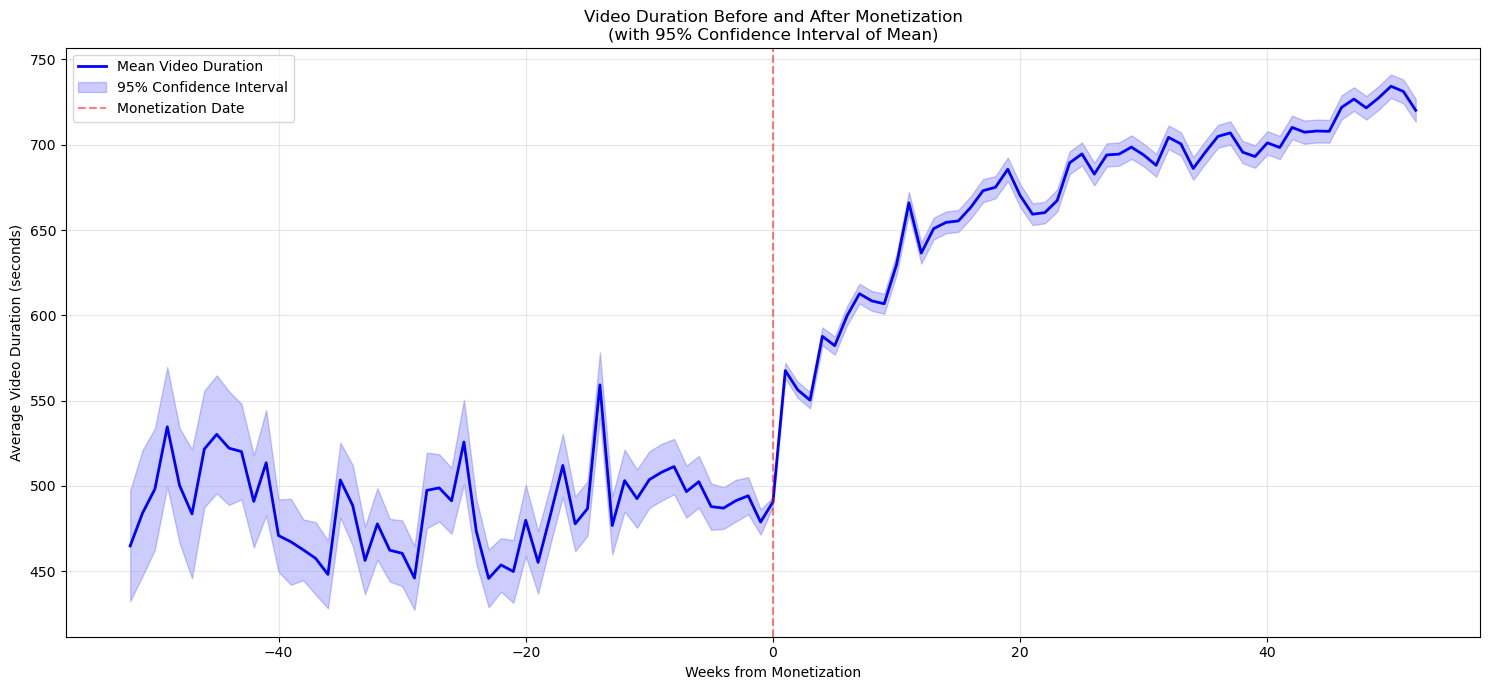


Summary Statistics (Video Duration):
--------------------------------------------------

3 months before:
Average duration: 491.46 seconds
Median duration: 211.00 seconds
95% CI: (489.21, 493.70)
Number of videos: 1385541
Number of channels: 133041

3 months after:
Average duration: 579.01 seconds
Median duration: 225.00 seconds
95% CI: (577.61, 580.40)
Number of videos: 4875237
Number of channels: 133041

6 months before:
Average duration: 490.21 seconds
Median duration: 211.00 seconds
95% CI: (488.14, 492.27)
Number of videos: 1601022
Number of channels: 133041

6 months after:
Average duration: 615.30 seconds
Median duration: 236.00 seconds
95% CI: (614.17, 616.43)
Number of videos: 8302998
Number of channels: 133041

1 year before:
Average duration: 489.75 seconds
Median duration: 211.00 seconds
95% CI: (487.86, 491.65)
Number of videos: 1867559
Number of channels: 133041

1 year after:
Average duration: 658.47 seconds
Median duration: 252.00 seconds
95% CI: (657.62, 659.32)
Numbe

In [8]:
from scipy import stats

def analyze_duration_around_monetization():
    # First find the earliest monetization date per channel
    first_monetization = df_monetization[df_monetization['monetization_types'] != 'none'].groupby('channel_id')['upload_date'].min().reset_index()
    first_monetization.columns = ['channel', 'first_monetization_date']
    
    # Create date column for merging
    df_monetization['date'] = pd.to_datetime(df_monetization['upload_date']).dt.date
    
    # Merge monetization dates with duration data
    merged_df = pd.merge(df_monetization, first_monetization, 
                        left_on='channel_id', right_on='channel', 
                        how='left')
    
    # Calculate weeks from monetization
    merged_df['weeks_from_monetization'] = (pd.to_datetime(merged_df['date']) - 
                                          pd.to_datetime(merged_df['first_monetization_date'])).dt.days // 7
    
    # Focus on a window of 52 weeks before and after monetization
    window_df = merged_df[merged_df['weeks_from_monetization'].between(-52, 52)]
    
    # Calculate weekly stats
    weekly_means = window_df.groupby('weeks_from_monetization')['duration'].mean()
    weekly_counts = window_df.groupby('weeks_from_monetization')['duration'].count()
    weekly_sems = window_df.groupby('weeks_from_monetization')['duration'].apply(
        lambda x: stats.sem(x, nan_policy='omit')
    )
    
    # Create the statistics dataframe
    weekly_stats = pd.DataFrame({
        'mean': weekly_means,
        'count': weekly_counts,
        'sem': weekly_sems
    })
    weekly_stats = weekly_stats.reset_index()
    
    # Calculate confidence intervals
    weekly_stats['ci_lower'] = weekly_stats['mean'] - 1.96 * weekly_stats['sem']
    weekly_stats['ci_upper'] = weekly_stats['mean'] + 1.96 * weekly_stats['sem']
    
    # Plotting
    plt.figure(figsize=(15, 7))
    
    # Plot mean line
    plt.plot(weekly_stats['weeks_from_monetization'],
             weekly_stats['mean'],
             color='blue',
             linewidth=2,
             label='Mean Video Duration')
    
    # Add 95% confidence interval bands
    plt.fill_between(weekly_stats['weeks_from_monetization'],
                    weekly_stats['ci_lower'],
                    weekly_stats['ci_upper'],
                    color='blue',
                    alpha=0.2,
                    label='95% Confidence Interval')
    
    # Add vertical line at monetization date
    plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Monetization Date')
    
    # Formatting
    plt.title('Video Duration Before and After Monetization\n(with 95% Confidence Interval of Mean)')
    plt.xlabel('Weeks from Monetization')
    plt.ylabel('Average Video Duration (seconds)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics (Video Duration):")
    print("-" * 50)
    periods = {
        "3 months before": (-12, 0),
        "3 months after": (0, 12),
        "6 months before": (-24, 0),
        "6 months after": (0, 24),
        "1 year before": (-52, 0),
        "1 year after": (0, 52)
    }
    
    for period, (start, end) in periods.items():
        period_data = window_df[window_df['weeks_from_monetization'].between(start, end)]
        mean = period_data['duration'].mean()
        median = period_data['duration'].median()
        n = len(period_data)
        se = stats.sem(period_data['duration'], nan_policy='omit')
        ci_lower = mean - 1.96 * se
        ci_upper = mean + 1.96 * se
        
        print(f"\n{period}:")
        print(f"Average duration: {mean:.2f} seconds")
        print(f"Median duration: {median:.2f} seconds")
        print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")
        print(f"Number of videos: {n}")
        print(f"Number of channels: {period_data['channel_id'].nunique()}")
    
    # Conduct statistical tests
    before_data = window_df[window_df['weeks_from_monetization'].between(-52, -1)]['duration']
    after_data = window_df[window_df['weeks_from_monetization'].between(0, 52)]['duration']
    
    t_stat, p_value = stats.ttest_ind(before_data, after_data, nan_policy='omit')
    
    print("\nStatistical Test:")
    print("-" * 50)
    print("Independent t-test (before vs after monetization):")
    print(f"t-statistic: {t_stat:.3f}")
    print(f"p-value: {p_value:.4f}")
    
    # Calculate effect size (Cohen's d)
    d = (after_data.mean() - before_data.mean()) / np.sqrt((after_data.var() + before_data.var()) / 2)
    print(f"Effect size (Cohen's d): {d:.3f}")

# Run the analysis
analyze_duration_around_monetization()

This graph illustrates perhaps the most significant shift in creator strategy - the evolution of content depth and quality. 
Pre-monetization video durations fluctuate around 500 seconds with wide confidence intervals, indicating inconsistent approaches to content length. 
The post-monetization period shows a sustained upward trend in video duration, eventually exceeding 700 seconds. 
Unlike the spike-and-decline pattern seen in production frequency, this increase is gradual and sustained, suggesting a fundamental shift in content philosophy rather than a reactive change. The narrowing confidence intervals post-monetization tell a story of increasing professionalization - creators developing consistent standards for their content length and quality. The steady climb rather than sudden jump implies this was a learning process, with creators gradually discovering that longer, more detailed content better serves their monetized channels. This trend aligns with platform algorithms that tend to favor longer watch times and suggests creators becoming more strategic about engagement metrics.- 

## Subscriber to View Ratio Before and After Monetization:

The relationship between subscribers and views, normalized to show subscribers gained per 1,000 views. The blue line represents the mean weekly subscriber-to-view ratio, while the light blue shaded area shows the 95% confidence interval. The data spans 40 weeks before and after monetization, with the monetization date marked by a red dashed line at week 0. This visualization helps us understand how a channel's ability to convert viewers into subscribers changes throughout their monetization journey.

/var/folders/05/9v_chqnd12v90dtrbyb3b5sc0000gn/T/ipykernel_11409/762919516.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries_cleaned['date'] = pd.to_datetime(df_timeseries_cleaned['datetime']).dt.date


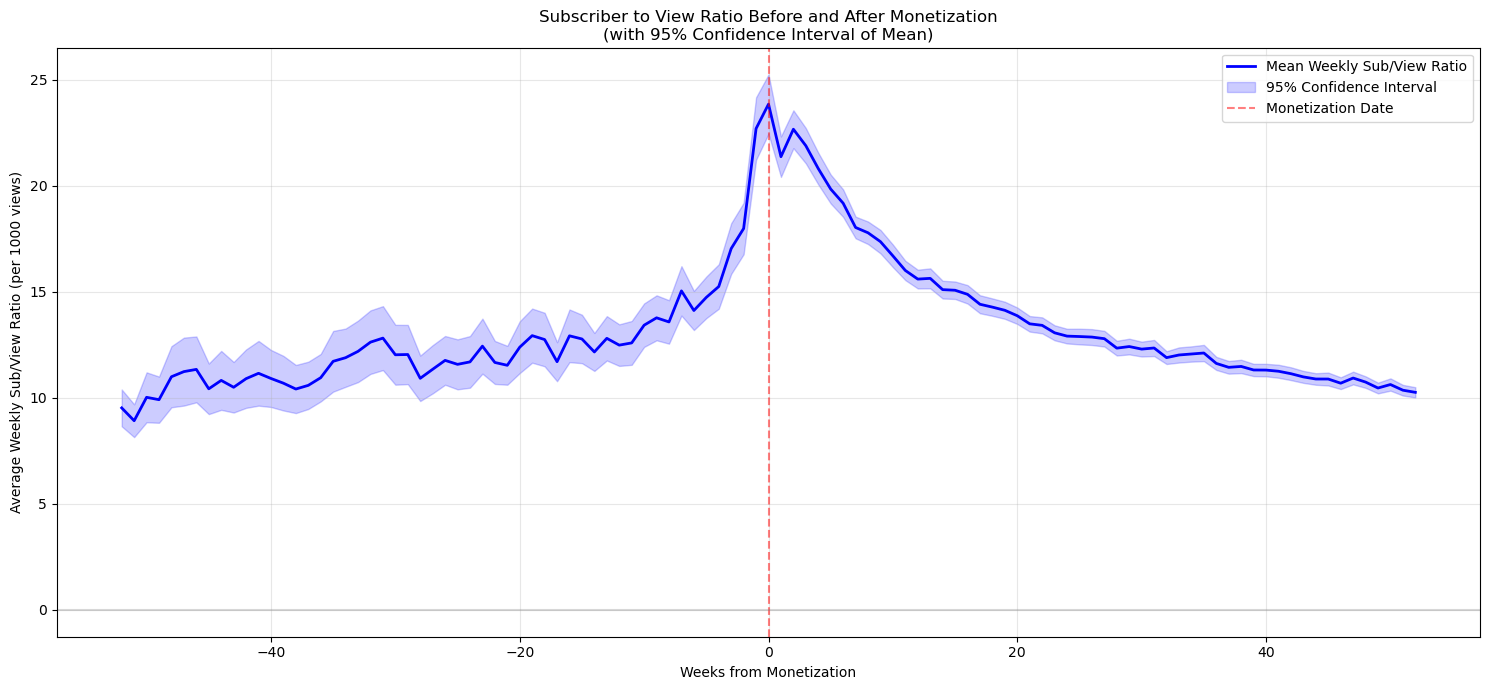


Summary Statistics (Sub/View Ratio):
--------------------------------------------------

3 months before:
Average sub/view ratio: 16.3355
95% CI: (16.0088, 16.6622)
Number of valid observations: 154053
Number of channels: 19209

3 months after:
Average sub/view ratio: 18.7904
95% CI: (18.6081, 18.9728)
Number of valid observations: 354778
Number of channels: 38285

6 months before:
Average sub/view ratio: 14.7311
95% CI: (14.4959, 14.9664)
Number of valid observations: 257332
Number of channels: 19350

6 months after:
Average sub/view ratio: 16.1301
95% CI: (16.0279, 16.2323)
Number of valid observations: 830907
Number of channels: 47317


In [9]:

from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# First find the earliest monetization date per channel
first_monetization = df_monetization[df_monetization['monetization_types'] != 'none'].groupby('channel_id')['upload_date'].min().reset_index()
first_monetization.columns = ['channel', 'first_monetization_date']

# Convert timeseries datetime column to date format for merging
df_timeseries_cleaned['date'] = pd.to_datetime(df_timeseries_cleaned['datetime']).dt.date

# Merge the datasets
merged_df = pd.merge(df_timeseries_cleaned, first_monetization, on='channel', how='left')

# Calculate weeks from monetization
merged_df['weeks_from_monetization'] = (pd.to_datetime(merged_df['date']) - 
                                      pd.to_datetime(merged_df['first_monetization_date'])).dt.days // 7

# Calculate subscriber to views ratio with better handling of edge cases
# Filter out rows where delta_views is 0 or very small
merged_df['sub_view_ratio'] = np.where(
    (merged_df['delta_views'] > 100),  # Only consider significant view changes
    (merged_df['delta_subs'] / merged_df['delta_views']) * 1000,
    np.nan
)

# Remove infinite values and extreme outliers
merged_df['sub_view_ratio'] = merged_df['sub_view_ratio'].replace([np.inf, -np.inf], np.nan)
# Remove outliers beyond 3 standard deviations
z_scores = stats.zscore(merged_df['sub_view_ratio'].dropna())
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
merged_df.loc[merged_df['sub_view_ratio'].notna(),'sub_view_ratio'] = \
    merged_df.loc[merged_df['sub_view_ratio'].notna(),'sub_view_ratio'][filtered_entries]

# Focus on a window of 52 weeks before and after monetization
window_df = merged_df[merged_df['weeks_from_monetization'].between(-52, 52)]

# Calculate weekly stats for the ratio
weekly_means = window_df.groupby('weeks_from_monetization')['sub_view_ratio'].mean()
weekly_counts = window_df.groupby('weeks_from_monetization')['sub_view_ratio'].count()
weekly_sems = window_df.groupby('weeks_from_monetization')['sub_view_ratio'].apply(lambda x: stats.sem(x, nan_policy='omit'))

# Create the statistics dataframe
weekly_stats = pd.DataFrame({
    'mean': weekly_means,
    'count': weekly_counts,
    'sem': weekly_sems
})
weekly_stats = weekly_stats.reset_index()

# Calculate confidence intervals
weekly_stats['ci_lower'] = weekly_stats['mean'] - 1.96 * weekly_stats['sem']
weekly_stats['ci_upper'] = weekly_stats['mean'] + 1.96 * weekly_stats['sem']

# Plotting
plt.figure(figsize=(15, 7))

# Plot mean line
plt.plot(weekly_stats['weeks_from_monetization'], 
         weekly_stats['mean'], 
         color='blue', 
         linewidth=2,
         label='Mean Weekly Sub/View Ratio')

# Add 95% confidence interval bands
plt.fill_between(weekly_stats['weeks_from_monetization'],
                weekly_stats['ci_lower'],
                weekly_stats['ci_upper'],
                color='blue',
                alpha=0.2,
                label='95% Confidence Interval')

# Add vertical line at monetization date
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Monetization Date')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Formatting
plt.title('Subscriber to View Ratio Before and After Monetization\n(with 95% Confidence Interval of Mean)')
plt.xlabel('Weeks from Monetization')
plt.ylabel('Average Weekly Sub/View Ratio (per 1000 views)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics (Sub/View Ratio):")
print("-" * 50)
periods = {
    "3 months before": (-12, 0),
    "3 months after": (0, 12),
    "6 months before": (-24, 0),
    "6 months after": (0, 24)
}

for period, (start, end) in periods.items():
    period_data = window_df[window_df['weeks_from_monetization'].between(start, end)]
    mean = period_data['sub_view_ratio'].mean()
    n = len(period_data['sub_view_ratio'].dropna())  # Count only non-null values
    se = stats.sem(period_data['sub_view_ratio'].dropna(), nan_policy='omit')
    ci_lower = mean - 1.96 * se
    ci_upper = mean + 1.96 * se
    
    print(f"\n{period}:")
    print(f"Average sub/view ratio: {mean:.4f}")
    print(f"95% CI: ({ci_lower:.4f}, {ci_upper:.4f})")
    print(f"Number of valid observations: {n}")
    print(f"Number of channels: {period_data['channel'].nunique()}")

The data reveals several fascinating patterns in subscriber acquisition efficiency.
Before monetization, channels maintained a relatively stable ratio of around 10-12 subscribers per 1,000 views, with some minor fluctuations. 

However, the most striking feature is the dramatic spike that occurs around the monetization date, where the ratio surges to approximately 23 subscribers per 1,000 views - nearly double the pre-monetization average. 
This peak is followed by a gradual but consistent decline over the subsequent 40 weeks, eventually returning to roughly the pre-monetization levels of about 10 subscribers per 1,000 views. 
This pattern suggests that monetization creates a temporary boost in subscriber conversion, possibly due to increased creator investment in content quality or changes in audience engagement behavior, but this effect diminishes over time as the channel matures. 

The narrowing confidence interval after monetization also indicates more consistent performance across different channels in the long term.

## "The Monetization Strategy Breakdown - A Cross-Section of Creator Approaches"

We provide a comprehensive snapshot of how different monetization strategies shape creator behavior. By comparing affiliate marketing, membership programs, merchandise sales, non-monetized channels, and other revenue models across four key metrics (uploads, views, subscribers, and video duration), we can see how creators optimize their content strategy based on their primary revenue source. Think of this as a creator's strategic playbook - each monetization type creates its own distinct pattern of behavior and success metrics.

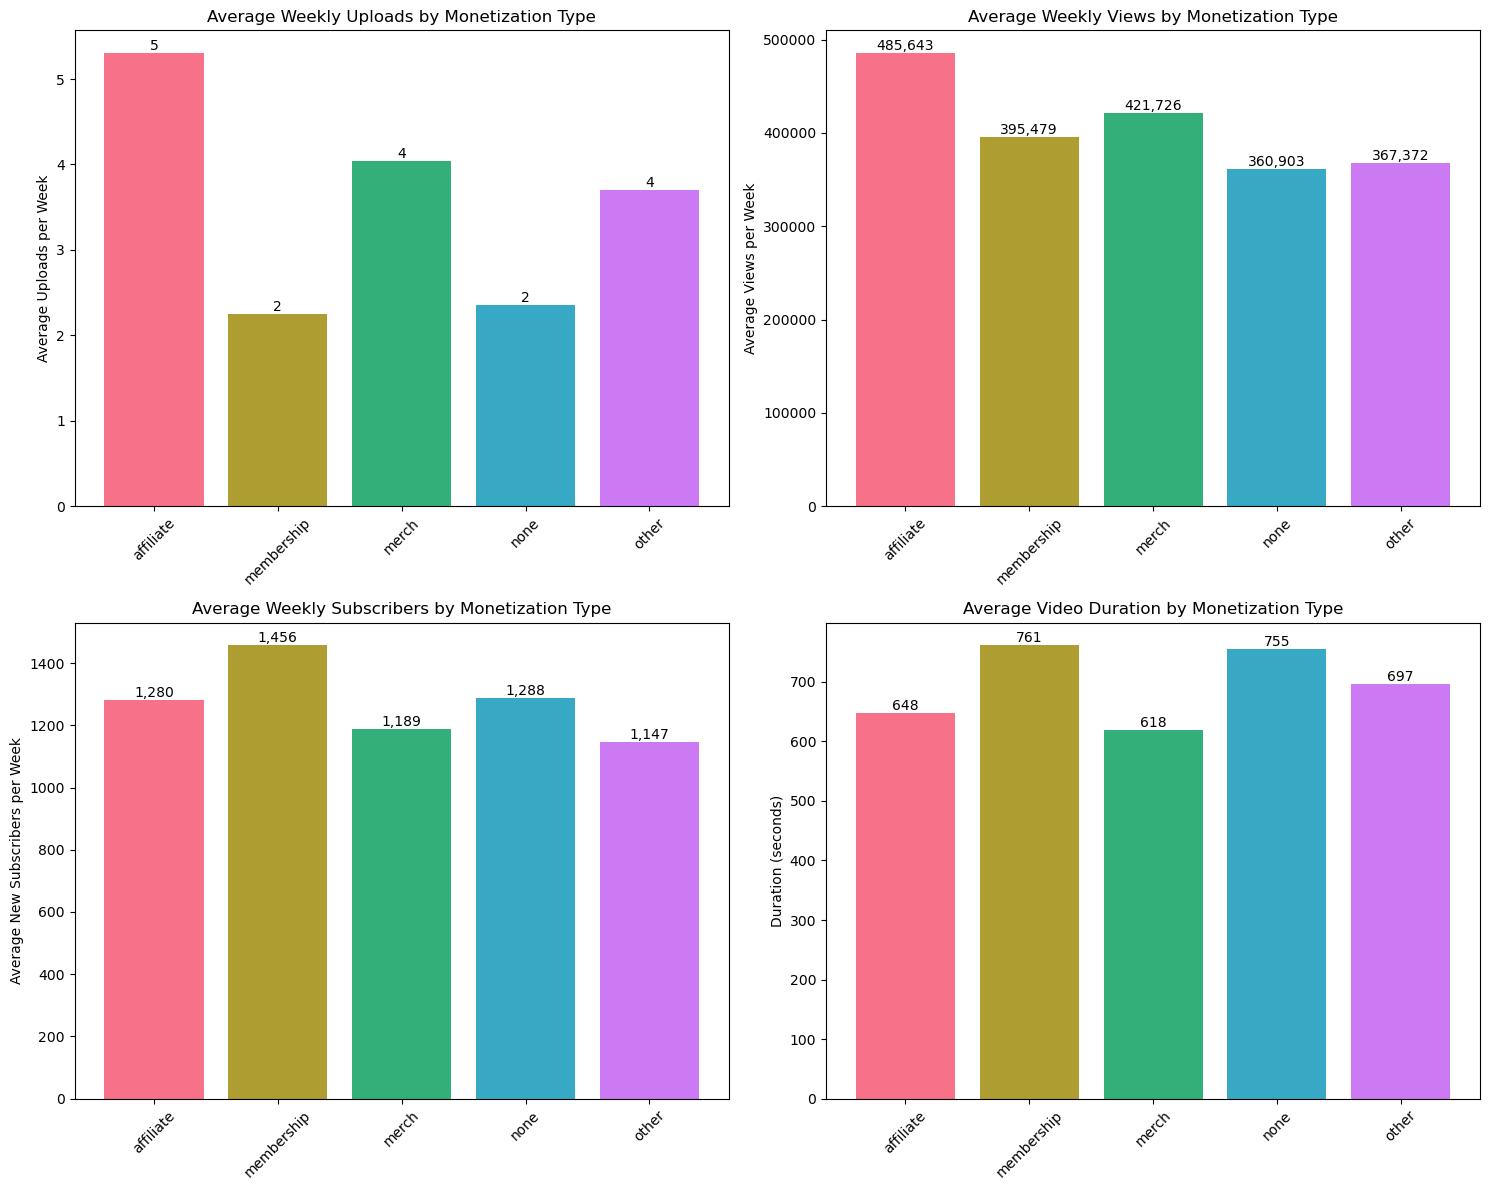


Detailed Statistics by Main Monetization Type:

Monetization Type: affiliate
--------------------------------------------------
Number of Channels: 17,806

Uploads:
  Average per week: 5.30
  Median per week: 1.45

Views:
  Average per week: 485,643
  Median per week: 51,500

Subscribers:
  Average per week: 1279.94
  Median per week: 179.95

Video Duration:
  Average: 648 seconds
  Median: 215 seconds

Monetization Type: membership
--------------------------------------------------
Number of Channels: 132,295

Uploads:
  Average per week: 2.25
  Median per week: 0.76

Views:
  Average per week: 395,479
  Median per week: 54,766

Subscribers:
  Average per week: 1456.38
  Median per week: 256.59

Video Duration:
  Average: 761 seconds
  Median: 286 seconds

Monetization Type: merch
--------------------------------------------------
Number of Channels: 24,653

Uploads:
  Average per week: 4.04
  Median per week: 1.24

Views:
  Average per week: 421,726
  Median per week: 50,557

Subscr

In [10]:
from scipy import stats

def analyze_trends_by_main_monetization_types():
    """
    Analyzes trends in uploads, views, subscribers, and duration across main monetization types
    """
    # Create simplified monetization categories
    def simplify_monetization_type(mon_type):
        if pd.isna(mon_type) or mon_type == 'none':
            return 'none'
        elif 'membership' in mon_type:
            return 'membership'
        elif 'affiliate' in mon_type:
            return 'affiliate'
        elif 'merch' in mon_type:
            return 'merch'
        elif 'superchat' in mon_type:
            return 'superchat'
        else:
            return 'other'
    
    # Create copy of monetization data with simplified categories
    df_mon_simplified = df_monetization.copy()
    df_mon_simplified['main_monetization'] = df_mon_simplified['monetization_types'].apply(simplify_monetization_type)
    
    # Analyze metrics for each main type
    def analyze_metrics_for_type(mon_type):
        # Get channels with this monetization type
        channels = df_mon_simplified[df_mon_simplified['main_monetization'] == mon_type]['channel_id'].unique()
        
        # Get timeseries data for these channels
        channel_data = df_timeseries_cleaned[df_timeseries_cleaned['channel'].isin(channels)]
        
        # Get duration data
        duration_data = df_mon_simplified[df_mon_simplified['channel_id'].isin(channels)]['duration']
        
        # Calculate metrics
        metrics = {
            'num_channels': len(channels),
            'avg_uploads_per_week': channel_data.groupby('channel')['delta_videos'].mean().mean(),
            'med_uploads_per_week': channel_data.groupby('channel')['delta_videos'].mean().median(),
            'avg_views_per_week': channel_data.groupby('channel')['delta_views'].mean().mean(),
            'med_views_per_week': channel_data.groupby('channel')['delta_views'].mean().median(),
            'avg_subs_per_week': channel_data.groupby('channel')['delta_subs'].mean().mean(),
            'med_subs_per_week': channel_data.groupby('channel')['delta_subs'].mean().median(),
            'avg_duration': duration_data.mean(),
            'med_duration': duration_data.median(),
            'total_channels': len(channels)
        }
        
        return metrics
    
    # Get main monetization types
    main_types = sorted(df_mon_simplified['main_monetization'].unique())
    
    # Calculate metrics for each main type
    results = {mon_type: analyze_metrics_for_type(mon_type) 
              for mon_type in main_types if pd.notna(mon_type)}
    
    # Create visualization subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Colors for consistency
    colors = sns.color_palette("husl", len(results))
    
    # Helper function for plotting
    def plot_metric(ax, metric_name, title, ylabel):
        data = {k: v[metric_name] for k, v in results.items()}
        ax.bar(data.keys(), data.values(), color=colors)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.tick_params(axis='x', rotation=45)
        
        # Add value labels on top of bars
        for i, v in enumerate(data.values()):
            ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
    
    # 1. Uploads Analysis
    plot_metric(ax1, 'avg_uploads_per_week', 
               'Average Weekly Uploads by Monetization Type',
               'Average Uploads per Week')
    
    # 2. Views Analysis
    plot_metric(ax2, 'avg_views_per_week',
               'Average Weekly Views by Monetization Type',
               'Average Views per Week')
    
    # 3. Subscribers Analysis
    plot_metric(ax3, 'avg_subs_per_week',
               'Average Weekly Subscribers by Monetization Type',
               'Average New Subscribers per Week')
    
    # 4. Duration Analysis
    plot_metric(ax4, 'avg_duration',
               'Average Video Duration by Monetization Type',
               'Duration (seconds)')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nDetailed Statistics by Main Monetization Type:")
    print("=" * 80)
    
    for mon_type, metrics in results.items():
        print(f"\nMonetization Type: {mon_type}")
        print("-" * 50)
        print(f"Number of Channels: {metrics['num_channels']:,}")
        print("\nUploads:")
        print(f"  Average per week: {metrics['avg_uploads_per_week']:.2f}")
        print(f"  Median per week: {metrics['med_uploads_per_week']:.2f}")
        print("\nViews:")
        print(f"  Average per week: {metrics['avg_views_per_week']:,.0f}")
        print(f"  Median per week: {metrics['med_views_per_week']:,.0f}")
        print("\nSubscribers:")
        print(f"  Average per week: {metrics['avg_subs_per_week']:.2f}")
        print(f"  Median per week: {metrics['med_subs_per_week']:.2f}")
        print("\nVideo Duration:")
        print(f"  Average: {metrics['avg_duration']:.0f} seconds")
        print(f"  Median: {metrics['med_duration']:.0f} seconds")
    
    # Statistical Analysis
    print("\nStatistical Analysis:")
    print("=" * 80)
    
    metrics_to_test = {
        'delta_videos': 'uploads',
        'delta_views': 'views',
        'delta_subs': 'subscribers'
    }
    
    for metric, name in metrics_to_test.items():
        print(f"\nKruskal-Wallis H-test for {name}:")
        # Gather data for each monetization type
        data_by_type = []
        labels = []
        for mon_type in main_types:
            channels = df_mon_simplified[df_mon_simplified['main_monetization'] == mon_type]['channel_id'].unique()
            metric_data = df_timeseries_cleaned[df_timeseries_cleaned['channel'].isin(channels)][metric].values
            data_by_type.append(metric_data)
            labels.append(mon_type)
        
        # Perform Kruskal-Wallis H-test
        h_stat, p_val = stats.kruskal(*data_by_type)
        print(f"H-statistic: {h_stat:.3f}")
        print(f"p-value: {p_val:.4f}")

# Run the analysis
analyze_trends_by_main_monetization_types()

Our analysis reveals distinct patterns in how channels evolve with different monetization strategies. Affiliate-monetized channels stand out as the most prolific content producers, averaging 5 uploads per week - more than double the rate of membership-focused channels (2 uploads) and significantly higher than non-monetized channels (2 uploads). This suggests that affiliate partnerships may incentivize more frequent content creation, possibly due to the need to regularly showcase products or services.

When it comes to viewership, affiliate channels also lead the pack, garnering an average of 485,643 weekly views, followed by merchandise-focused channels with 421,726 views. This indicates that affiliate content tends to attract larger audiences, perhaps due to the combination of regular uploads and product-focused content that often aligns with viewer interests and search patterns.

However, the subscriber story tells a different tale. Membership-based channels, despite posting less frequently, achieve the highest weekly subscriber growth at 1,456 new subscribers per week. This suggests that while they produce less content, their videos may be of higher quality or provide more value to viewers, encouraging long-term channel commitment.

The duration analysis provides another interesting insight - Membership-based followed by non-monetized channels actually produce longer videos (averaging respectively 761 and 755 seconds) compared to affiliate channels (648 seconds). This could indicate that monetization strategies might influence content length.

Looking at the distributions across channels, we see significant variability within each monetization type, suggesting that success isn't solely tied to monetization strategy. However, the patterns suggest that different monetization approaches might lead to different content strategies:

1. Affiliate channels focus on frequent, shorter content with broad reach
2. Membership channels prioritize subscriber growth through less frequent but potentially more engaging content
3. Merchandise-focused channels maintain a balanced approach between views and engagement and tend toward longer-form content, perhaps focusing more on creative expression.

These findings suggest that successful YouTubers adapt their content strategy to align with their chosen monetization approach, rather than following a one-size-fits-all model. The data also hints at a possible evolution in content strategy as channels mature and diversify their revenue streams, with each monetization type potentially serving different stages of a channel's growth journey.
